<a href="https://colab.research.google.com/github/Harmony-Group-ML/Tamrinat-1404-10-03/blob/main/Heart_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

نمونه داده‌ها:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0     0.0  
1    2.0  3.0   3.0     2.0  
2    2.0  2.0   7.0     1.0  
3    3.0  0.0   3.0     0.0  
4    1.0  0.0   3.0     0.0  
Epoch [10/50], Loss: 0.6579
Epoch [20/50], Loss: 0.2936
Epoch [30/50], Loss: 0.4481
Epoch [40/50], Loss: 0.1251
Epoch [50/50], Loss: 0.2580

Accuracy: 0.8667
Confusion Matrix:
[[32  4]
 [ 4 20]]


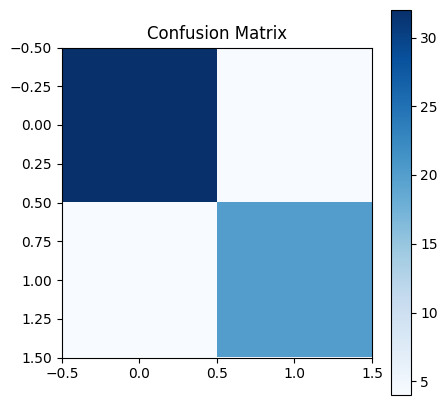

✅ پروژه آماده است! مدل PyTorch روی دیتاست Heart Disease اجرا شد و خروجی نمایش داده شد.


In [1]:
# ====== مرحله 1: نصب وابستگی‌ها ======
!pip install torch torchvision pandas scikit-learn matplotlib

# ====== مرحله 2: دانلود دیتاست Heart Disease (Cleveland) ======
import pandas as pd

columns = ['age','sex','cp','trestbps','chol','fbs','restecg',
           'thalach','exang','oldpeak','slope','ca','thal','target']
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
data = pd.read_csv(url, names=columns)

# جایگزینی '?' با NaN و حذف ردیف‌های مشکل‌دار
data = data.replace('?', pd.NA).dropna().astype(float)

print("نمونه داده‌ها:")
print(data.head())

# ====== مرحله 3: آماده‌سازی داده‌ها ======
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop('target', axis=1).values
y = (data['target'] > 0).astype(int).values  # 0=healthy, 1=disease

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ====== مرحله 4: ساخت مدل PyTorch ======
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

class HeartNet(nn.Module):
    def __init__(self, input_dim):
        super(HeartNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

model = HeartNet(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ====== مرحله 5: آموزش مدل ======
epochs = 50
for epoch in range(epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# ====== مرحله 6: ارزیابی مدل ======
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_class = (y_pred > 0.5).int()

from sklearn.metrics import accuracy_score, confusion_matrix
acc = accuracy_score(y_test, y_pred_class)
cm = confusion_matrix(y_test, y_pred_class)

print(f'\nAccuracy: {acc:.4f}')
print('Confusion Matrix:')
print(cm)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()

print("✅ پروژه آماده است! مدل PyTorch روی دیتاست Heart Disease اجرا شد و خروجی نمایش داده شد.")